# Neprekidnost

Sadržaj:
1. [Realne funkcije jedne promenljive](#Realne-funkcije-jedne-promenljive)
1. [Vektorske funkcije i funkcije više promenljivih](#Vektorske-funkcije-i-funkcije-više-promenljivih)
    1. [Granične vrednosti i neprekidnost](#Granične-vrednosti-i-neprekidnost)

In [1]:
import numpy as np
import matplotlib as mplb
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

## Realne funkcije jedne promenljive

**Defincija 1.** Za niz realnih brojeva $\{x_n\}_{n\in\mathbb{N}}\subset\mathbb{R}$ kažemo da je konvregentan i da ima graničnu vrednost $A\in\mathbb{R},$ 
$$\lim_{n\to\infty}x_n=A,$$
ukoliko za proizvoljno izabarano $\varepsilon>0$ postoji indeks $n_0\in\mathbb{N}$ takav da za sve indekse $n\geq n_0$ važi da je $|x_n-A|<\varepsilon.$

**Definicija 2.** Neka je $D\subseteq\mathbb{R}$ i $a\in D$ tačka takva da neka njena probušena okolina $\dot{O}(a)=\{x\in\mathbb{R}\ \big|\ 0<|x-a|<r\}$ cela pripada skupu $D.$  Za funkciju $f:D\mapsto\mathbb{R}$ kažemo da je
 $A\in\mathbb{R}$ granična vrednost funkcije $f$ kada $x\to a$ 
 $$\lim_{x\to a}f(x)=A,$$
ukoliko za proizvoljno izabrano $\varepsilon>0$ postoji $0<\delta<r$ tako da za $x\in D$ važi
$$|x-a|<\delta\quad\Longleftrightarrow\quad |f(x)-A|<\varepsilon.$$

**Teorema 1.** Funkcija $f$ ima graničnu vrednost $\displaystyle\lim_{x\to a}f(x)=A,$ akko za svaki niz brojeva $\{x_n\}_{n\in\mathbb{N}}\subset\dot{O}(a)$ koji konvergira ka tački $a,$ i niz $\{f(x_n)\}_{n\in\mathbb{N}}$ teži $A.$
$$\lim_{x\to a}f(x)=A\quad\Longleftrightarrow\quad 
\big(\forall\{x_n\}_{n\in\mathbb{N}}\subset\dot{O}(a)\big)\left(\lim_{n\to\infty}x_n=a
\quad\Longrightarrow\quad \lim_{n\to\infty}f(x_n)=A\right)$$

**Definicija 3.** Funkcija je neprekidna u tački $c\in(a,b)$ ukoliko je $\displaystyle\lim_{x\to c}f(x)=f(c).$ Funkcija je neprekidna na $(a,b)$ ako je neprekidna u svakoj tački intervala $(a,b).$

**Teorema 2.** Neka je funkcija $f(x):[a,b]\mapsto\mathbb{R},\ [a,b]\subset\mathbb{R},$ neprekidna na zatvorenom ograničenom skupu $[a,b].$ Tada je $f$ ograničena na $D$ i na njemu dostiže maksimalnu i minimalnu vrednost.

Granične vrednosti funkcija, samim tim i neprekidnost, možemo da proveravamo kroz konvergenciju nizova. Izborom niza $x_k\to a$ u domenu funkcije, proveravamo postojanje granične vrednosti funkcije preko nizova $f(x_k).$ To je analogno uzorkovanju funkcije u nekoj $\delta-$okolini tačke $a.$

**Primer 1.** Uzorkovanjem funkcija $f(x)=\sin x$ i $g(x)=\sin\dfrac1x$ proverićemo postojanje granične vrednosti kada $x\to0.$ Menjanjem vrednosti parametra `delta` utičemo na širinu $\delta-$okoline funkcije. Na osnovu toga merimo i širinu $\varepsilon-$okoline funkcije kao maksimalnu apsolutnu vrednost uzorka funkcije. S obzirom da je funkcija $\sin$ neparna dovoljno je da posmatramo vrednosti $f$ i $g$ za $x>0.$ Zanima nas da li postoji gomilanje vrednosti ka prvom elementu svakog od uzoraka.

In [2]:
t=np.linspace(1e-10,1,11)

def f(x):
    fx=np.sin(x)
    return(fx)

def g(x):
    gx=np.sin(1/x)
    return(gx)

def uzorak(delta):
    x=delta*t
    ft=f(x)
    gt=g(x)
    print("uzorci f:",np.round(ft,2))
    print("epsilon_f=",np.max(ft))
    print("uzorci g:",np.round(gt,2))
    print("epsilon_g=",np.max(np.abs(gt)))

In [3]:
rezultat=widgets.interact(uzorak, delta=(1e-6, 0.5, 1e-5))
rezultat

interactive(children=(FloatSlider(value=0.24999100000000002, description='delta', max=0.5, min=1e-06, step=1e-…

<function __main__.uzorak(delta)>

Eksperimentom smo potvrdili poznat rezultat:
\begin{align}
&\lim_{x\to0}\sin x=0,\\
&\not\exists\lim_{x\to0}\sin\dfrac1x
\end{align}

Slično, eksperiment možemo da sprovedemo i kroz grafički prikaz.

In [4]:
def epsilon_f(delta):
    x=delta*t
    ft=f(x)
    eps=np.max(ft)
    plt.figure(figsize=(4,4))
    plt.plot(x,ft,'ob',-x,-ft,'ob')
    plt.axhline(color='black', zorder=-1)
    plt.axvline(color='black', zorder=-1)
    plt.axhline(y=eps,color='black',linestyle='--', zorder=-1)
    plt.axhline(y=-eps,color='black',linestyle='--', zorder=-1)
    plt.axvline(x=delta,color='black',linestyle='--', zorder=-1)
    plt.axvline(x=-delta,color='black',linestyle='--', zorder=-1)
    plt.xticks([-0.5,-delta,delta,0.5],["-1/2", "-delta","delta","1/2"])
    plt.yticks([-1,-eps,eps,1],["-1", "-epsilon","epsilon","1"])
    plt.xlim(-0.5, 0.5)
    plt.ylim(-1, 1);

In [5]:
interactive_plot = widgets.interact(epsilon_f, delta=(1e-6, 0.5, 1e-5))
interactive_plot

interactive(children=(FloatSlider(value=0.24999100000000002, description='delta', max=0.5, min=1e-06, step=1e-…

<function __main__.epsilon_f(delta)>

In [6]:
def epsilon_g(delta):
    x=delta*t
    gt=g(x)
    eps=np.max(np.abs(gt))
    plt.figure(figsize=(4,4))
    plt.plot(x,gt,'ob',-x,-gt,'ob')
    plt.axhline(color='black', zorder=-1)
    plt.axvline(color='black', zorder=-1)
    plt.axhline(y=eps,color='black',linestyle='--', zorder=-1)
    plt.axhline(y=-eps,color='black',linestyle='--', zorder=-1)
    plt.axvline(x=delta,color='black',linestyle='--', zorder=-1)
    plt.axvline(x=-delta,color='black',linestyle='--', zorder=-1)
    plt.xticks([-0.5,-delta,delta,0.5],["-1/2", "-delta","delta","1/2"])
    plt.yticks([-1,-eps,eps,1],["-1", "-epsilon","epsilon","1"])
    plt.xlim(-0.5, 0.5)
    plt.ylim(-1, 1);

In [7]:
interactive_plot = widgets.interact(epsilon_g, delta=(1e-6, 0.5, 1e-5))
interactive_plot

interactive(children=(FloatSlider(value=0.24999100000000002, description='delta', max=0.5, min=1e-06, step=1e-…

<function __main__.epsilon_g(delta)>

Za određivanje tačke ekstremuma funkcije na nekom segmentu možemo da koristimo funkcije `argmin` i `argmax` na dovljno gusto biranom uzorku. Za funkcije $f$ i $g$ potražićemo ekstremne vrednosti ma segmentu $[-\pi,pi].$

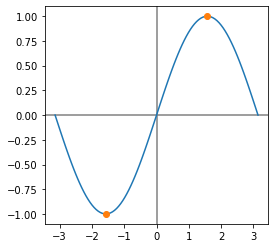

In [8]:
t=np.pi*np.linspace(-1,1,100)
ft=f(t)
i_min , i_max=np.argmin(ft) , np.argmax(ft)
t[i_min], t[i_max]

plt.figure(figsize=(4,4))
plt.plot(t,ft)
plt.plot([t[i_min], t[i_max]],[ft[i_min], ft[i_max]],'o')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1);

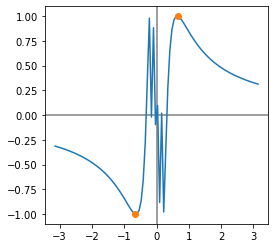

In [9]:
gt=g(t)
i_min , i_max=np.argmin(gt) , np.argmax(gt)
t[i_min], t[i_max]

plt.figure(figsize=(4,4))
plt.plot(t,gt)
plt.plot([t[i_min], t[i_max]],[gt[i_min], gt[i_max]],'o')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1);

## Vektorske funkcije i funkcije više promenljivih

Kod funkcija sa više promenljivih ili više izlaza, osnovni element izračunavanja graničnih vrednosti jeste kroz konvergenciju nizova. Sada su članovi niza $v_k$ elementi $\mathbb{R}^n.$

**Definicija 4.**    Za niz vektora $\{v_k\}\subset\mathbb{R}^n$ kažemo da konvergira ka vektoru $a\in\mathbb{R}^n$ ako $\|a-v_k\|\to0,$ $k\to\infty.$ 	To obeležavamo  na već poznat način:
	$$v_k\to a,\ k\to\infty\ \Longleftrightarrow\ \|v-v_k\|\to0,\ k\to\infty.$$ 

Ova definicija važi za bilo koji izbor norme u $\mathbb{R}^n,$ tj. ako niz vektora konvergira u jednoj normi konvergiraće i u bilo kojoj drugoj normi. Ovo svojstvo zovemo ekvivalentnost normi.

**Primer 2.** U $2D$ posmatramo $\varepsilon-$okoline u odnosu na $L_1,L_2$ i $L_{\infty}$ normu. Primećujemo da sa promenom veličine $\varepsilon\to0$  sve $\varepsilon-$okoline teže koordinatnom početku, tj. nula-vektoru.

In [10]:
x=np.linspace(0,1,50)
yL1=1-x
yL2=(1-x**2)**(1/2)

In [11]:
def eps_okoline(t):
    plt.figure(figsize=(4,4))
    plt.title("epsilon okoline") 
    plt.plot(t*x,t*yL1,'b',t*x,-t*yL1,'b',-t*x,t*yL1,'b',-t*x,-t*yL1,'b')
    plt.plot(t*x,t*yL2,'b',t*x,-t*yL2,'b',-t*x,t*yL2,'b',-t*x,-t*yL2,'b')
    plt.plot(t*np.array([-1,1,1,-1,-1]),t*np.array([1,1,-1,-1,1]),'b')
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.xticks([-1, 0, 1])
    plt.yticks([-1, 0, 1])
    plt.axhline(color='black', zorder=-1)
    plt.axvline(color='black', zorder=-1)
    plt.grid();

In [12]:
interactive_plot = widgets.interact(eps_okoline, t=(0.1,1,0.1))
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0, min=0.1), Output()), _dom_classes=('wid…

<function __main__.eps_okoline(t)>

Zbog ekvivalencije normi je konvergencija niza vektora $\{v_k\}\subset\mathbb{R}^n$
$$v_k\to a,\ k\to\infty,$$
jednaka konvergenciji svake od komponenti ovih vektora. Ukoliko označimo komponente vektora sa:
$$v_k=\begin{bmatrix} x_1^k&x_2^k&\dots&x_n^k\end{bmatrix}^T,\qquad\mbox{ i }\qquad
a=\begin{bmatrix} a_1&a_2&\dots&a_n\end{bmatrix}^T,$$ tada je
$$v_k\to a,\ k\to\infty\quad\Longleftrightarrow\quad
\begin{cases}
x_1^k\to a_1,\ k\to\infty,\\
x_2^k\to a_2,\ k\to\infty,\\
\vdots\\
x_n^k\to a_n,\ k\to\infty.
\end{cases}$$
Konvergencija vektora u $\mathbb{R}^n$ svodi se na konvergenciju $n$ nizova u $\mathbb{R}.$

Na osnovu definicije 4 i nejednakosti trougla zaključujemo da važi
$$v_k\to a,\ k\to\infty\ \Longrightarrow\ \big|\|a\|-\|v_k\|\big|\leq\|a-v_k\|\to0,\ k\to\infty\ \Longrightarrow\ \|v_k\|\to\|a\|,\ k\to\infty.$$
Ovo svojstvo norme zovemo **neprekidnost norme**.

**Definicija 5.** Skup $D\subset\mathbb{R}^n$ je zatvoren ako sadrži svaku graničnu vrednost niza vektora iz $D.$
$$\{v_k\}\subset D,\ \lim_{k\to\infty}v_k=a\quad\Longrightarrow\quad a\in D.$$

Skup $D\subset\mathbb{R}^n$ je ograničen ako $\exists M>0$ tako da $(\forall v\in D)(\|v\|\leq M).$

Skup $D\subset\mathbb{R}^n$ je kompakt, ili kompaktan skup, ako je zatvoren i ograničen.

**Primer 3.** Segment $[a,b]$ je kompakt u $\mathbb{R}.$ Kompaktne skupove u $\mathbb{R}^n$ možemo smatrati uopštenjem segmenata u više dimenzija. 

$\varepsilon-$okolina tačke $v\in\mathbb{R}^n$ je skup $$O_{\varepsilon}(v)=\big\{u\in\mathbb{r}^n\ \big|\ \|v-u\|<\varepsilon\big\}.$$

Zatvorena $\varepsilon-$okolina tačke $v\in\mathbb{R}^n$ je skup $${O_{\varepsilon}}[v]=\big\{u\in\mathbb{r}^n\ \big|\ \|v-u\|\leq\varepsilon\big\}$$
i predstavlja kompakt u $\mathbb{R}^n.$

### Granične vrednosti i neprekidnost

#### Krive

Prvo predstavljamo granične vrednosti i neprekidnost vektorske funkcije jedne realne promenljive. 

Granična vrednost krive $r(t):\mathbb{R}\mapsto\mathbb{R}^n$ zbog osobina normi u konačno dimenzionalnim vektorskim prostorima svodi se na određivanje graničnih vrednosti komponentnih funkcija.

**Definicija 6.** Ukoliko je $r(t)=\begin{bmatrix} x_1(t)& x_2(t)&\dots&x_n(t)\end{bmatrix}^T:\mathbb{R}\mapsto\mathbb{R}^n,$ i $a\in\mathbb{R},$ tada je 
$$\lim_{t\to a}r(t)=\begin{bmatrix} \displaystyle\lim_{t\to a}x_1(t)& \displaystyle\lim_{t\to a}x_2(t)&\dots&\displaystyle\lim_{t\to a}x_n(t)\end{bmatrix}^T,$$
pod uslovom da sve navedene granične vrednosti komponentnih funkcija postoje.

Napomenimo da su ovde mogle da se koristi definicija preko $\varepsilon-\delta$ okolina, kao što je to dato za realne funkcije. Ipak, pristup primenjen u definiciji 5 opisuje realan postupak izračunavanja granične vrednosti funkcije $r(t).$

Na osnovu definicije 6. vidimo da se osobine granične vrednosti realne funkcije jedne promenljive prenose kroz koordinatne funkcije i na funkcije krive.

**Definicija 7.** Vektorska funkcija krive $r(t)=\begin{bmatrix} x_1(t)& x_2(t)&\dots&x_n(t)\end{bmatrix}^T:\mathbb{R}\mapsto\mathbb{R}^n,$ je neprekidna u tački $a\in\mathbb{R},$ ukoliko je 
$$\lim_{t\to a}r(t)=r(a),$$
tj. ako su u $a$ neprekidne sve komponentne funkcije $x_k(t).$ Funkcija je neprekidna na nekom skupu kada je neprekidna u svakoj tački tog skupa.

**Primer 4.** Skiciraćemo grafik parametarske funkcije
$$r(t)=\begin{bmatrix} t^2-2t& t+1\end{bmatrix}^T\quad\Longleftrightarrow\quad 
\begin{cases}
x=x(t)=t^2-2t,\\ y=y(t)=t+1.
\end{cases}$$
Svaka vrednost parametra $t$ definiše koordinate jedne tačke sa grafika ove krive. Tako npr. za $t=0$ nalazimo $x=0,y=1.$ Kroz tabelu vrednosti koordinata tačaka sa krive na osnovu nekoliko vrednosti parametra $t,$ kao i na sonovu skice grafika ove krive, proverićemo postojanje granične vrednosti za neko konkretno $t\in(-2,2).$ 

In [13]:
t=np.linspace(-4,4)
x=t**2-2*t
y=t+1

def epsilon_krive(tacka,delta):
    tk=np.linspace(tacka-delta,tacka+delta,7)
    xk=tk**2-2*tk
    yk=tk+1
    plt.figure(figsize=(4,4))
    plt.plot(x,y,'-b', label="kriva") 
    plt.plot(xk,yk,'ok',label='epsilon-okolina')
    plt.plot(tacka**2-2*tacka,tacka+1,'or',label='tačka')
    plt.axhline(color='black', zorder=-1)
    plt.axvline(color='black', zorder=-1)
    plt.legend()
    plt.grid()
    plt.xlim(-2, 8)
    plt.ylim(-1, 5);

In [14]:
interactive_plot = widgets.interact(epsilon_krive, tacka=(-2,2,0.1), delta=(1e-6, 2.5, 1e-5))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='tacka', max=2.0, min=-2.0), FloatSlider(value=1.2499…

<function __main__.epsilon_krive(tacka, delta)>

Vidimo da za svaku tačku sa krive suženje $\delta-$okoline domena dovodi do suženja $\varepsilon-$okoline tačke u kodomenu. Time potvrđujemo da je parametrizacijom $r(t)=\begin{bmatrix} t^2-2t& t+1\end{bmatrix}^T$ zadata neprekidna kriva.

#### Realne funkcije više promenljivih

Analiziraćemo sada dodavanje dimezija u domen realne funckije.

**Definicija 8.** Neka je $f:D\mapsto\mathbb{R},\ D\subset\mathbb{R}^n$ funkcija čiji domen sadrži neku okolinu tačke $u,$ osim eventualno same tačke $a.$  Granična vrednost funkcije $f(v)$ kada se $v$ približava $u$ je broj $L\in\mathbb{R},$ u oznaci
$$\lim_{v\to u}f(v)=L,$$
ukoliko za proizvoljno izabrano $\varepsilon>0$ postoji $\delta>0$ tako da
$$(\forall v\in D)\quad \big(0<\|v-u\|<\delta\ \Longrightarrow\ |f(v)-L|<\varepsilon\big).$$
<div>
   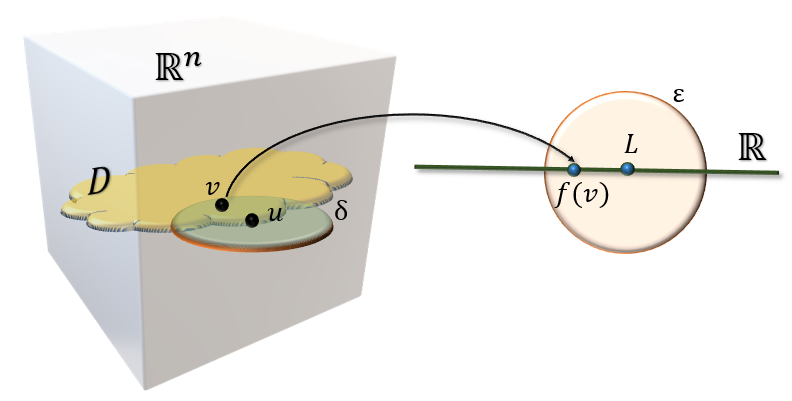  
</div>

**Teorema 3.** Granična vrednost funkcije $f:D\mapsto\mathbb{R},\ D\subset\mathbb{R}^n$ 
$$\lim_{v\to a}f(v)=L$$
postoji akko postoji odgovarajuća granična vrednost kada $v$ teži $a$ duž bilo koje krive koja prolazi kroz $a,$ i jednaka je $L.$

**Primer 5.** Potražićemo graničnu vrednost $\displaystyle\lim_{(x,y)\to(0,0)}\dfrac{6x^2y^2}{x^2+y^2}\,.$ Neka je $\delta>0$ i $\sqrt{x^2+y^2}<\delta.$ Tada je i 
$x^2,y^2\leq x^2+y^2,$  pa važi
$$\dfrac{6x^2y^2}{x^2+y^2}\leq6\dfrac{(x^2+y^2)^2}{x^2+y^2}=
6(x^2+y^2)<6\delta^2.$$
Prema tome, ukoliko je $\varepsilon>6\delta^2\ \Longleftrightarrow\ \delta<\sqrt{\dfrac{\varepsilon}{6}},$ imamo
$$\left|f(x,y)-0\right|=\left|\dfrac{6x^2y^2}{x^2+y^2}\right|=\dfrac{6x^2y^2}{x^2+y^2}<6\delta^2<\varepsilon.$$
Zaključujemo $\displaystyle\lim_{(x,y)\to(0,0)}\dfrac{6x^2y^2}{x^2+y^2}=0.$

Izračunavanjem vrednosti uzoraka funkcije na mreži tačaka unutar kvadrata sa centrom u koordinatnom početku, možemo da proverimo ovaj rezultat. Ukoliko se sve vrednosti oko centra tabele približavaju nuli, potvrdili smo korektnost teorijskog rezultata.

In [15]:
x=np.linspace(-0.5,0.5,14)
X,Y=np.meshgrid(x,x)
Xsq=X**2
Ysq=Y**2
Z=6*Xsq*Ysq/(Xsq+Ysq)
print(np.round(Z,2))

[[0.75 0.63 0.49 0.34 0.19 0.08 0.01 0.01 0.08 0.19 0.34 0.49 0.63 0.75]
 [0.63 0.54 0.43 0.31 0.18 0.07 0.01 0.01 0.07 0.18 0.31 0.43 0.54 0.63]
 [0.49 0.43 0.36 0.27 0.17 0.07 0.01 0.01 0.07 0.17 0.27 0.36 0.43 0.49]
 [0.34 0.31 0.27 0.22 0.15 0.07 0.01 0.01 0.07 0.15 0.22 0.27 0.31 0.34]
 [0.19 0.18 0.17 0.15 0.11 0.06 0.01 0.01 0.06 0.11 0.15 0.17 0.18 0.19]
 [0.08 0.07 0.07 0.07 0.06 0.04 0.01 0.01 0.04 0.06 0.07 0.07 0.07 0.08]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.   0.   0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.   0.   0.01 0.01 0.01 0.01 0.01 0.01]
 [0.08 0.07 0.07 0.07 0.06 0.04 0.01 0.01 0.04 0.06 0.07 0.07 0.07 0.08]
 [0.19 0.18 0.17 0.15 0.11 0.06 0.01 0.01 0.06 0.11 0.15 0.17 0.18 0.19]
 [0.34 0.31 0.27 0.22 0.15 0.07 0.01 0.01 0.07 0.15 0.22 0.27 0.31 0.34]
 [0.49 0.43 0.36 0.27 0.17 0.07 0.01 0.01 0.07 0.17 0.27 0.36 0.43 0.49]
 [0.63 0.54 0.43 0.31 0.18 0.07 0.01 0.01 0.07 0.18 0.31 0.43 0.54 0.63]
 [0.75 0.63 0.49 0.34 0.19 0.08 0.01 0.01 0.08 0.19

Sličnu analizu sprovodimo i grafički, kroz $\varepsilon$ i $\delta$ okoline. Tome mogu da posluže i $3D$ i konturni grafik. 

In [ ]:
%matplotlib notebook

In [21]:
%matplotlib inline

In [16]:
x=np.linspace(-0.5,0.5,50)

In [17]:
def epsilon3D(delta):
    t=delta*x
    X,Y=np.meshgrid(t,t)
    Xsq=X**2
    Ysq=Y**2
    Z=6*Xsq*Ysq/(Xsq+Ysq)
    kv=[-delta/2,delta/2]
    Xkv,Ykv=np.meshgrid(kv,kv)
    Zkv=0*Xkv
    grafik =  plt.figure(figsize=plt.figaspect(1.05))
    ax = grafik.add_subplot(projection='3d')
    ax.plot_surface(Xkv,Ykv,Zkv,label='delta okolina')
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([-1, 0, 1])
    ax.set_zticks([-1, 0, 1])
    ax.plot_surface(X, Y, Z , cmap=cm.gist_heat,label='epsilon okolina')
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-0.3,1])
    plt.title("Grafik");

In [18]:
interactive_plot = widgets.interact(epsilon3D, tacka=(-2,2,0.1), delta=(1e-6, 2.5, 1e-5))
interactive_plot

interactive(children=(FloatSlider(value=1.249991, description='delta', max=2.5, min=1e-06, step=1e-05), Output…

<function __main__.epsilon3D(delta)>

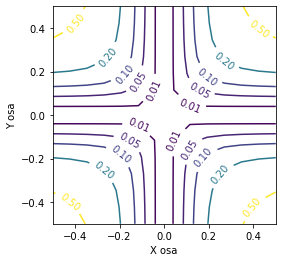

In [19]:
plt.figure(figsize=(4,4))
kontura=plt.contour(X,Y,Z,[0,0.01,0.05,0.1,0.2,0.5])
plt.clabel(kontura,inline=True, fontsize=10)#dodavanje oznaka nivoa konturnih linija
plt.xlabel('X osa')
plt.ylabel('Y osa');

**Primer 6.** Ispitaćemo da li postoji granična vrednost $$\lim_{(x,y)\to(0,0)}\dfrac{x^2y}{x^4+y^2}\,.$$ Napravićemo tabelu uzoraka vrednosti funkcije $f(x,y)=\dfrac{x^2y}{x^4+y^2}$ u okolini tačke $(0,0).$ Primetimo prvo da je funkcija $f(x,y)$ parna po $x,$ a neparna po $y,$ tj.
$$f(-x,y)=\dfrac{(-x)^2y}{(-x)^4+y^2}=\dfrac{x^2y}{x^4+y^2}=f(x,y),\qquad 
f(x,-y)=\dfrac{x^2(-y)}{x^4+(-y)^2}=-\dfrac{x^2y}{x^4+y^2}=-f(x,y).$$
Zbog toga, dovoljno je uzorkovanje funkcije u prvom kvadrantu domena.

In [20]:
x=np.linspace(0.01,0.5,14)
X,Y=np.meshgrid(x,x)
Xsq=X**2
Ysq=Y**2
Z=(Xsq*Y)/(Xsq**2+Ysq)
print(np.round(Z,2))

[[0.01 0.22 0.48 0.46 0.34 0.24 0.17 0.13 0.1  0.08 0.07 0.06 0.05 0.04]
 [0.   0.05 0.15 0.29 0.42 0.49 0.49 0.45 0.4  0.34 0.29 0.25 0.21 0.18]
 [0.   0.03 0.08 0.17 0.28 0.38 0.46 0.5  0.5  0.47 0.43 0.39 0.34 0.31]
 [0.   0.02 0.06 0.12 0.2  0.29 0.38 0.44 0.49 0.5  0.49 0.47 0.43 0.4 ]
 [0.   0.01 0.05 0.09 0.16 0.23 0.31 0.38 0.44 0.48 0.5  0.5  0.48 0.45]
 [0.   0.01 0.04 0.08 0.13 0.19 0.26 0.33 0.39 0.45 0.48 0.5  0.5  0.49]
 [0.   0.01 0.03 0.06 0.11 0.16 0.22 0.29 0.35 0.41 0.45 0.48 0.5  0.5 ]
 [0.   0.01 0.03 0.06 0.09 0.14 0.2  0.25 0.31 0.37 0.42 0.46 0.49 0.5 ]
 [0.   0.01 0.02 0.05 0.08 0.12 0.17 0.23 0.28 0.34 0.39 0.43 0.47 0.49]
 [0.   0.01 0.02 0.04 0.07 0.11 0.16 0.21 0.26 0.31 0.36 0.41 0.45 0.47]
 [0.   0.01 0.02 0.04 0.07 0.1  0.14 0.19 0.24 0.29 0.34 0.38 0.42 0.46]
 [0.   0.01 0.02 0.04 0.06 0.09 0.13 0.17 0.22 0.27 0.31 0.36 0.4  0.44]
 [0.   0.   0.02 0.03 0.06 0.08 0.12 0.16 0.2  0.25 0.29 0.34 0.38 0.42]
 [0.   0.   0.01 0.03 0.05 0.08 0.11 0.15 0.19 0.23

Tabela vrednosti funkcije $f$ sugeriše da približavanje koordinatnom početku domena duž $x$ ili $y$ ose dovodi do nagomilavanja vrednosti funkcije oko $0.$

Pojavljivanje vrednosti $0.5$ u svakoj vrsti, i to sve bliže početku sa manjim indeksom vrste, sugeriše da postoji putanja (kriva) do $(0,0)$ unutar domena duž koje se vrednosti funkcije $f$ nagomilavaju oko $\dfrac12.$ Zaista, ukoliko izaberemo $y=x^2,$ tj. parabolu kao putanju, nalazimo
$$f(x,x^2)=\dfrac{x^2x^2}{x^4+(x^2)^2}=\dfrac{x^4}{2x^4}=\dfrac12\to \dfrac12,\qquad (x,x^2)\to(0,0)\ \Longleftrightarrow\ x\to0.$$

Graničnu vrednost $\displaystyle\lim_{(x,y)\to(0,0)}\dfrac{x^2y}{x^4+y^2}\,$  možemo da analiziramo i kroz granične vrednosti duž pravaca $y=mx.$ Tada je 
$$f(x,mx)=\dfrac{x^2mx}{x^4+(mx)^2}=\dfrac{mx^3}{x^2(x^2+m^2)}=\dfrac{mx}{x^2+m^2}\to\dfrac{m\cdot0}{0^2+m^2}=0,\qquad x\to0.$$

Zaključujemo da granične vrednosti samo duž pravaca u ovom slučaju ne pomažu u uočavanju da granična vrednost $\displaystyle\lim_{(x,y)\to(0,0)}\dfrac{x^2y}{x^4+y^2}$ ne postoji.

In [21]:
def epsilon3D(delta):
    t=delta*x
    X,Y=np.meshgrid(t,t)
    Xsq=X**2
    Ysq=Y**2
    Z=(Xsq*Y)/(Xsq**2+Ysq)
    kv=[-delta/2,delta/2]
    Xkv,Ykv=np.meshgrid(kv,kv)
    Zkv=0*Xkv
    grafik =  plt.figure(figsize=plt.figaspect(1.05))
    ax = grafik.add_subplot(projection='3d')
    ax.plot_surface(Xkv,Ykv,Zkv,label='delta okolina',alpha=0.3)
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([-1, 0, 1])
    ax.set_zticks([-1, 0, 1])
    ax.plot_surface(X, Y, Z , cmap=cm.gist_heat,label='epsilon okolina')
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1/2,1/2])
    plt.title("Grafik")
    return(np.max(Z));

In [22]:
interactive_plot = widgets.interact(epsilon3D, tacka=(-2,2,0.1), delta=(1e-6, 2.5, 1e-5))
interactive_plot

interactive(children=(FloatSlider(value=1.249991, description='delta', max=2.5, min=1e-06, step=1e-05), Output…

<function __main__.epsilon3D(delta)>

Primećujemo da se opseg vrednosti funkcije ne sužava sa delta okolinom. Zbog toga ova funkcija nema graničnu vrednost u koordinatnom početku. I sa konturnog grafika možemo da uočimo linije različitih nivoa vrednosti koje se ulivaju u koordinatni početak. I to je pokazatelj da u toj tački granična vrednost ne postoji.

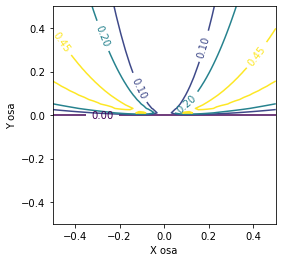

In [23]:
x=np.linspace(-0.5,0.5)
X,Y=np.meshgrid(x,x)
Xsq=X**2
Ysq=Y**2
Z=(Xsq*Y)/(Xsq**2+Ysq)

plt.figure(figsize=(4,4))
kontura=plt.contour(X,Y,Z,[0,0.1,0.2,0.45])
plt.clabel(kontura,inline=True, fontsize=10)#dodavanje oznaka nivoa konturnih linija
plt.xlabel('X osa')
plt.ylabel('Y osa');

Već na primeru funkcije dve promenljive uočavamo da je postojanje granične vrednosti funkcije više promenljivih veoma jak uslov. Samim tim i neprekidnost ovih funkcija je veoma zahtevna osobina.

**Definicija 9.** Funkcija $f(v):D\mapsto\mathbb{R},\ D\subset\mathbb{R}^n,$ je neprekidna u $u\in D$ ukoliko je 
$$\lim_{v\to u}f(v)=f(u).$$
Funkcija je neprekidna na skupu $D\subset\mathbb{R}^n$ ukoliko je neprekidna u svakoj tački skupa $D.$

Polinomi više promenljivih, bilo kog stepena, su neprekidne funkcije svuda. Na osnovu osobina graničnih vrednosti zaključujemo da su i racionalne funkcije više promenljivih neprekidne svuda gde su definisane.

**Teorema 4.** Neka je funkcija $f(v):D\mapsto\mathbb{R},\ D\subset\mathbb{R}^n,$ neprekidna na kompaktnom skupu $D.$ Tada je $f$ ograničena na $D$ i na njemu dostiže maksimalnu i minimalnu vrednost.

**Definicija 10.** Vektorska funkcija više promenljivih $F(x_1,x_2,\dots,x_n)=\begin{bmatrix}f_1(x_1,x_2,\dots,x_n)\\f_2(x_1,x_2,\dots,x_n)\\\vdots\\f_m(x_1,x_2,\dots,x_n)\end{bmatrix}$ je neprekidna u tački ako je takva i svaka od koordinatnih funkcija $f_k.$